In [166]:
import pandas as pd
import openpyxl
import numpy as np
import os
import glob2
import glob
import random
import sklearn
import ntpath
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from nltk.test.portuguese_en_fixt import setup_module
import nltk


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [167]:
setup_module
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
df = pd.read_excel('consolidadosvenda_produto_consolidado_26042022.xlsx'
, engine='openpyxl')


In [188]:
df.head(5)

,Produto,Saldo Inicial,Entradas,Devoluções,Compras,Saídas,Prêmio,Quant. Vendas,Valor Vendas,Lucro Bruto,Estoque Final,Data,Mês,Ano,Mês/Ano,insertion_id
0,ZIPER GROSSO FIXO 15cm MARINHO,47.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.30,46.0,2021-02-01,0,1,MP-01-02-2021,8394427216
1,"TOALHA MESA 1,60X2,40M BRANCA",1.0,0.0,0.0,0.0,0.0,0.0,1.0,58.0,22.00,0.0,2021-02-01,0,1,MP-01-02-2021,6476679065
2,TOALHA LAVABO MULTI ARTE - CREME,12.0,0.0,0.0,0.0,0.0,0.0,1.0,7.5,4.30,11.0,2021-02-01,0,1,MP-01-02-2021,179508519
3,TINTA TECIDO ACRILEX - 583 VERMELHO TOMATE,14.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,1.15,13.0,2021-02-01,0,1,MP-01-02-2021,3949263153
4,TINTA TECIDO ACRILEX - 569 CARAMELO,8.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,1.15,7.0,2021-02-01,0,1,MP-01-02-2021,1327829613


In [184]:
#check if there is Nan values in each field
df.isnull().sum()

Produto             0
Saldo Inicial       0
Entradas            0
Devoluções          0
Compras             0
Saídas              0
Prêmio              0
Quant. Vendas    1805
Valor Vendas     1417
Lucro Bruto      7525
Estoque Final       0
Data                0
Mês                 0
Ano                 0
Mês/Ano             0
insertion_id        0
dtype: int64

In [187]:
#replace NaN values with 0
df['Produto'].fillna('No_name', inplace=True)
df['Entradas'].fillna(0, inplace=True)
df['Saídas'].fillna(0, inplace=True)
df['Compras'].fillna(0, inplace=True)
df['Prêmio'].fillna(0, inplace=True)
df['Devoluções'].fillna(0, inplace=True)
df['Quant. Vendas'].fillna(0, inplace=True)
df['Valor Vendas'].fillna(0, inplace=True)
df['Lucro Bruto'].fillna(0, inplace=True)



#check if there is Nan values in each field
df.isnull().sum()

Produto          0
Saldo Inicial    0
Entradas         0
Devoluções       0
Compras          0
Saídas           0
Prêmio           0
Quant. Vendas    0
Valor Vendas     0
Lucro Bruto      0
Estoque Final    0
Data             0
Mês              0
Ano              0
Mês/Ano          0
insertion_id     0
dtype: int64

In [201]:
#create a tfidf vector for each product

df['Produto_prad'] = df['Produto_prad'].apply(lambda x: x.lower())
tokemizer = nltk.stem.RSLPStemmer()
(lambda x: [tokemizer.stem(word) for word in x.split()])
df['Produto_prad'] = df['Produto_prad'].apply(lambda x: ' '.join(x))
df['Produto_prad'].head(5)


LookupError: 
**********************************************************************
  Resource [93mrslp[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('rslp')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mstemmers/rslp/step0.pt[0m

  Searched in:
    - 'C:\\Users\\otavi/nltk_data'
    - 'c:\\Users\\otavi\\AppData\\Local\\Programs\\Python\\Python38\\nltk_data'
    - 'c:\\Users\\otavi\\AppData\\Local\\Programs\\Python\\Python38\\share\\nltk_data'
    - 'c:\\Users\\otavi\\AppData\\Local\\Programs\\Python\\Python38\\lib\\nltk_data'
    - 'C:\\Users\\otavi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [202]:




tfidf_vector = sklearn.feature_extraction.text.TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english')
df['Produto_prad'] = df['Produto'].astype(str).str.lower()
df['Produto_prad'] = df['Produto_prad'].str.replace('[^\w\s]','')
tfidf_vector.fit(df['Produto_prad'])
tfidf_vector.transform(df['Produto_prad'])
tfidf_vector.get_feature_names()
tfidf_vector.vocabulary_
tfidf_vector.idf_
tfidf_vector.vocabulary_



most_frequent_words = []
for i in range(len(tfidf_vector.get_feature_names())):
    if tfidf_vector.idf_[i] <= 0.5:
        most_frequent_words.append(tfidf_vector.get_feature_names()[i])


#create a list of categories based on the tfidf vector most frequent words
categories = []
for i in range(0,len(tfidf_vector.get_feature_names())):
    categories.append(tfidf_vector.get_feature_names()[i])
    
    #create a matrix of the tfidf vectors
tfidf_matrix = tfidf_vector.transform(df['Produto_prad'])
products = tfidf_vector.get_feature_names()
most_frequent_words

C:\Users\otavi\AppData\Local\Temp/ipykernel_9280/2678293730.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Produto_prad'] = df['Produto_prad'].str.replace('[^\w\s]','')


[]

In [192]:
count_df1 = df.groupby(['Data','Produto']).count()
#count sales by month and year
count_df1.head()


    

Saldo Inicial  Entradas  \
Data       Produto                                                      
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10              1         1   
           APLIQUE LASER HEIRAS                           1         1   
           BARBANTE LIMA 6 AZUL TURQUESA                  1         1   
           BARBANTE LIMA 6 LARANJA                        1         1   
           BARBANTE SPESSO - 24 FIOS CRU                  1         1   

                                              Devoluções  Compras  Saídas  \
Data       Produto                                                          
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10           1        1       1   
           APLIQUE LASER HEIRAS                        1        1       1   
           BARBANTE LIMA 6 AZUL TURQUESA               1        1       1   
           BARBANTE LIMA 6 LARANJA                     1        1       1   
           BARBANTE SPESSO - 24 FIOS CRU               1        1       1   

                                              Prêmio  Quant. Vendas  \
Data       Produto                                                    
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10       1              1   
           APLIQUE LASER HEIRAS                    1              1   
           BARBANTE LIMA 6 AZUL TURQUESA           1              1   
           BARBANTE LIMA 6 LARANJA                 1              1   
           BARBANTE SPESSO - 24 FIOS CRU           1              1   

                                              Valor Vendas  Lucro Bruto  \
Data       Produto                                                        
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10             1            1   
           APLIQUE LASER HEIRAS                          1            1   
           BARBANTE LIMA 6 AZUL TURQUESA                 1            1   
           BARBANTE LIMA 6 LARANJA                       1            1   
           BARBANTE SPESSO - 24 FIOS CRU                 1            1   

                                              Estoque Final  Mês  Ano  \
Data       Produto                                                      
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10              1    1    1   
           APLIQUE LASER HEIRAS                           1    1    1   
           BARBANTE LIMA 6 AZUL TURQUESA                  1    1    1   
           BARBANTE LIMA 6 LARANJA                        1    1    1   
           BARBANTE SPESSO - 24 FIOS CRU                  1    1    1   

                                              Mês/Ano  insertion_id  \
Data       Produto                                                    
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10        1             1   
           APLIQUE LASER HEIRAS                     1             1   
           BARBANTE LIMA 6 AZUL TURQUESA            1             1   
           BARBANTE LIMA 6 LARANJA                  1             1   
           BARBANTE SPESSO - 24 FIOS CRU            1             1   

                                              Produto_prad  
Data       Produto                                          
2020-10-01 APLIQUE LASER CANTONEIIRA FLOR 10             1  
           APLIQUE LASER HEIRAS                          1  
           BARBANTE LIMA 6 AZUL TURQUESA                 1  
           BARBANTE LIMA 6 LARANJA                       1  
           BARBANTE SPESSO - 24 FIOS CRU                 1

KeyError: 'Column not found: Entrada'

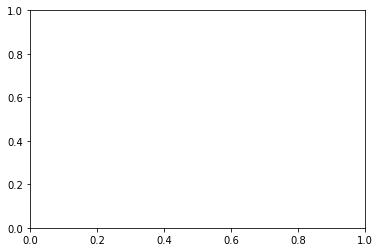

In [38]:
box_plot = df.boxplot(column='Entrada', by='Produto')
box_plot.set_title('Box Plot')
box_plot.set_xlabel('Produto')
box_plot.set_ylabel('Entrada')
box_plot.set_xticklabels(df['Produto'], rotation=90)
box_plot.set_yticklabels(df['Entrada'], rotation=90)
box_plot.show()
